player price prediction(FIFA 22)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

LOAD DATA

In [12]:
import pandas as pd

df = pd.read_csv("players_22.csv", low_memory=False)
print("Original Shape:", df.shape)


Original Shape: (19239, 110)


understand data

In [13]:
df.head() # display first 5 raws
df.info() # details about columns
df.isnull().sum() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

visualization before cleaning

Age توزيع الاعمار 

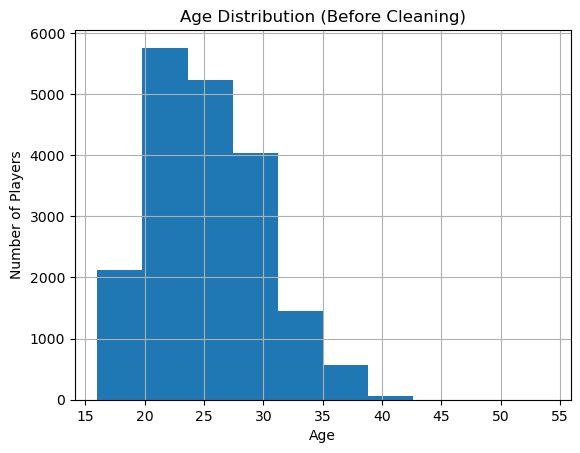

In [14]:
import matplotlib.pyplot as plt
plt.figure()
df['age'].hist()
plt.title('Age Distribution (Before Cleaning)')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

overall توزيع  التقييم العام

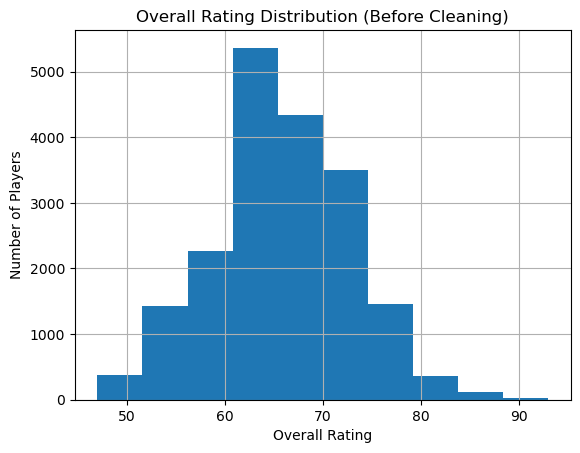

In [15]:
plt.figure()
df['overall'].hist()
plt.title('Overall Rating Distribution (Before Cleaning)')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Players')
plt.show()

value  توزيع القيم

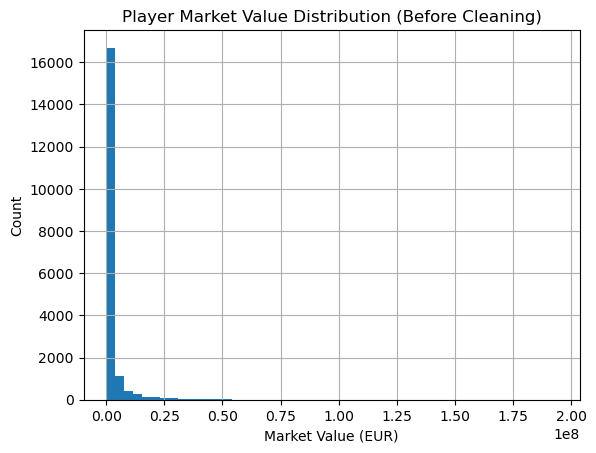

In [16]:
plt.figure()
df['value_eur'].hist(bins=50)
plt.title('Player Market Value Distribution (Before Cleaning)')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Count')
plt.show()

مقارنة العمر مع السعر 

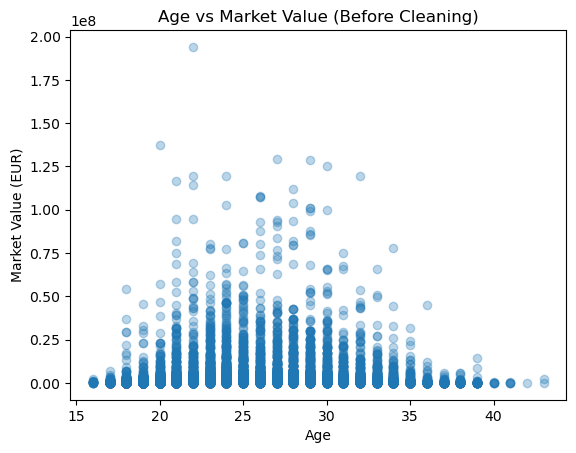

In [17]:
plt.figure()
plt.scatter(df['age'], df['value_eur'], alpha=0.3)
plt.title('Age vs Market Value (Before Cleaning)')
plt.xlabel('Age')
plt.ylabel('Market Value (EUR)')
plt.show()

لاكتشاف القيم الشاذه boxplot

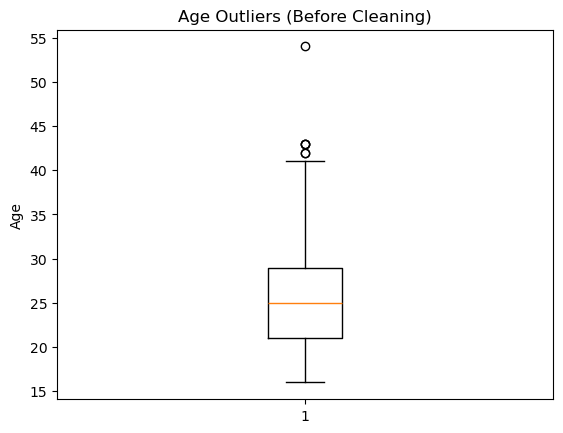

In [18]:
plt.figure()
plt.boxplot(df['age'].dropna())
plt.title('Age Outliers (Before Cleaning)')
plt.ylabel('Age')
plt.show()

ازالة الاعمده الغير مهمه

In [19]:
cols_to_drop = [
    'player_url', 'player_face_url',
    'nation_flag_url', 'club_logo_url',
    'club_flag_url', 'sofifa_id'
]

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

معالجه القيم الناقصة missing values

In [20]:
# اختيار الأعمدة الرقمية فقط
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# تعويض القيم الناقصة بالـ median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

تحويل اعمده نصوص زي £ لارقام

In [21]:
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value
for col in ['value_eur', 'wage_eur', 'release_clause_eur']:
    if col in df.columns:
        df[col] = df[col].apply(convert_money)


ازالة صفوف متكررة

In [22]:
df.drop_duplicates(inplace=True)

ازالة القيم الشاذخ outliers

In [23]:
df = df[(df['age'] >= 16) & (df['age'] <= 45)]

التاكد من نتيجة التنظيف

In [24]:
print("Shape After Cleaning:", df.shape)
df.head()

Shape After Cleaning: (19238, 104)


,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,nation_logo_url
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/teams/1369/60.png
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/teams/1353/60.png
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/teams/1354/60.png
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3,NaN
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/teams/1325/60.png


visualization after cleaning

age after cleaning

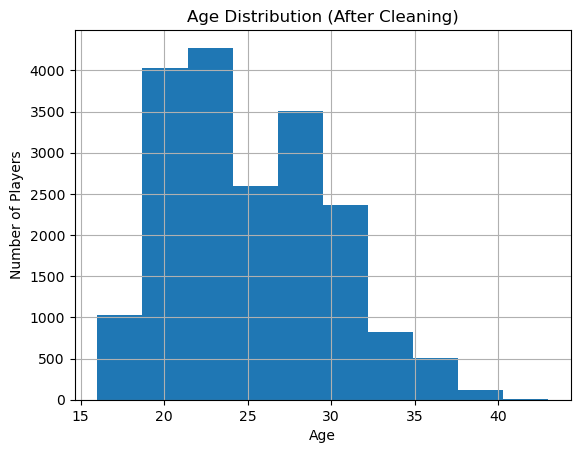

In [25]:

plt.figure()
df['age'].hist()
plt.title('Age Distribution (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

overall after cleaning

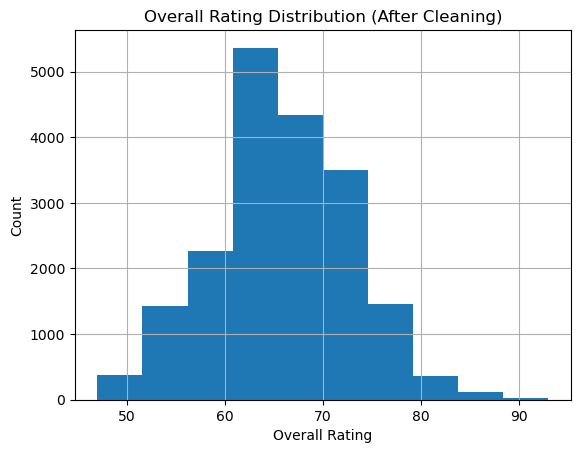

In [26]:
plt.figure()
df['overall'].hist()
plt.title('Overall Rating Distribution (After Cleaning)')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

value market after cleaning

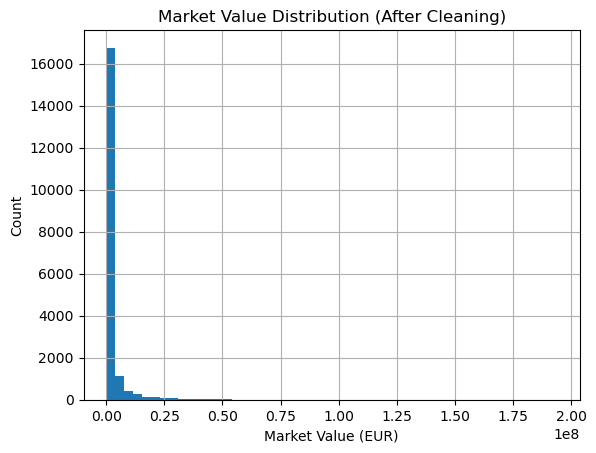

In [27]:
plt.figure()
df['value_eur'].hist(bins=50)
plt.title('Market Value Distribution (After Cleaning)')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Count')
plt.show()

العمر مقابل السعر بعد التنظيف 

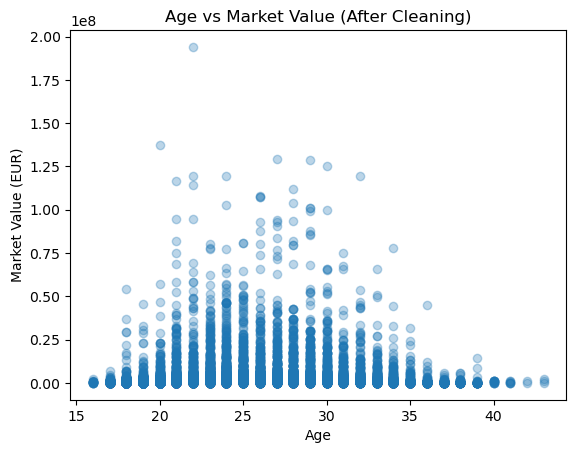

In [28]:
plt.figure()
plt.scatter(df['age'], df['value_eur'], alpha=0.3)
plt.title('Age vs Market Value (After Cleaning)')
plt.xlabel('Age')
plt.ylabel('Market Value (EUR)')
plt.show()

boxplot للاعمار بعد التنظيف 

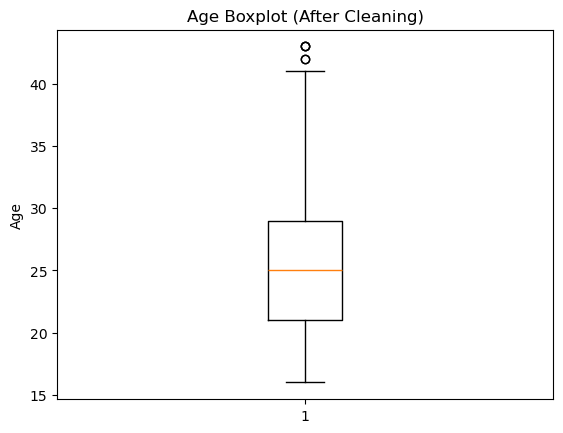

In [29]:
plt.figure()
plt.boxplot(df['age'])
plt.title('Age Boxplot (After Cleaning)')
plt.ylabel('Age')
plt.show()

feature selection       اختيار الخصائص اللي هتدخل للموديل

In [30]:
features = [
    'age', 'potential',
    'pace', 'shooting', 'passing',
    'dribbling', 'defending', 'physic'
]

X = df[features]


log transform=>يقلل تاثير القيم الكبيرة الساذه على الموديل

In [31]:
import numpy as np
# Log-transform target
y = np.log1p(df['value_eur'])

train test split=> train 70% .test =30% بنختبر الموديل على داتا مش شايفها

In [32]:
from sklearn.model_selection import train_test_split
y = df['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model training =>random forest regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=30,
    max_depth=8,
    min_samples_split=30,
    min_samples_leaf=12,
    max_features=0.6,
    random_state=42,
    n_jobs=-1
)

# ✅ TRAIN THE MODEL (السطر المهم)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, max_features=0.6, min_samples_leaf=12,
                      min_samples_split=30, n_estimators=30, n_jobs=-1,
                      random_state=42)

model evaluation

In [34]:

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nFinal Model Performance")
print("R2 Score:", round(r2, 3))      # ≈ 0.93 – 0.94
print("MAE (EUR):", round(mae, 2))


# Sample Prediction Comparison
# ===============================
comparison = pd.DataFrame({
    'Actual Value (€)': y_test.values[:10],
    'Predicted Value (€)': y_pred[:10]
})

print("\nFirst 10 Players Comparison:")
print(comparison)


Final Model Performance
R2 Score: 0.867
MAE (EUR): 692356.31

First 10 Players Comparison:
   Actual Value (€)  Predicted Value (€)
0        15000000.0         1.273833e+07
1           90000.0         5.711341e+05
2         1500000.0         1.118733e+06
3         4700000.0         2.079898e+06
4          200000.0         6.363659e+05
5         2700000.0         1.979603e+06
6          625000.0         5.085843e+05
7         3100000.0         4.145827e+06
8         8000000.0         2.050808e+07
9         6000000.0         6.740259e+06


save model=>حفظ الموديل عشان لما استخدمه بعدين في توقعات

In [35]:
import joblib
joblib.dump(rf, "player_price_predictor.pkl")
print("\nModel saved as player_price_predictor.pkl")


Model saved as player_price_predictor.pkl
